In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import linear_model


In [70]:
#Get the data
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [71]:
#The dataframe shape.
file.shape

(9134, 24)

In [72]:
#Change headers names.
file = file.rename(columns = {'EmploymentStatus':'Empoyment Status'})

In [73]:
#Dealing with NaN values, there are not NaN values.
file.isna().sum()
round(file.isna().sum()/len(file),4)*100 

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
Empoyment Status                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [74]:
#Split into 2 
y = file['Total Claim Amount']
X = file.drop(['Total Claim Amount'], axis=1)

In [75]:
#Split into X into numerical and categorical
X_num = X.select_dtypes(include= np.number)
X_cat = X.select_dtypes(include= object)
X_num.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
dtype: object

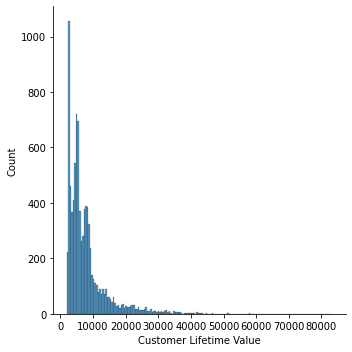

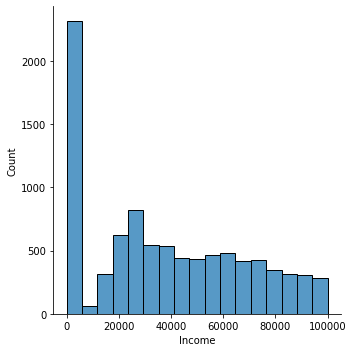

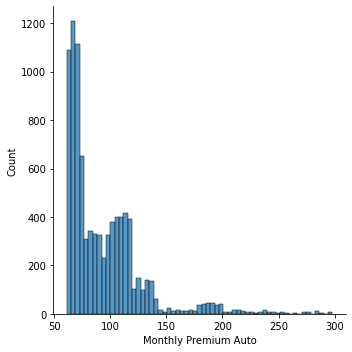

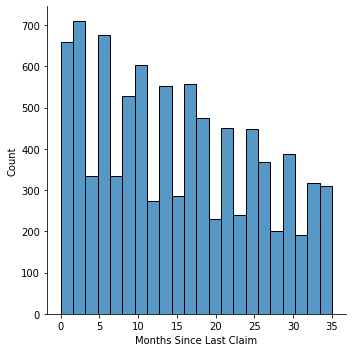

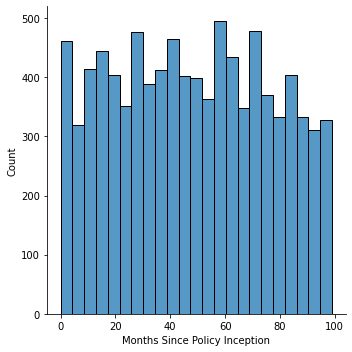

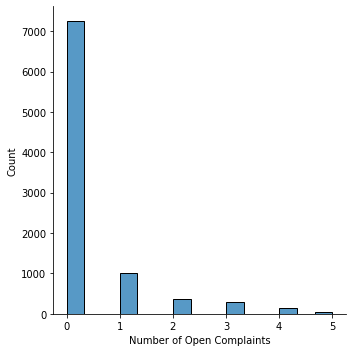

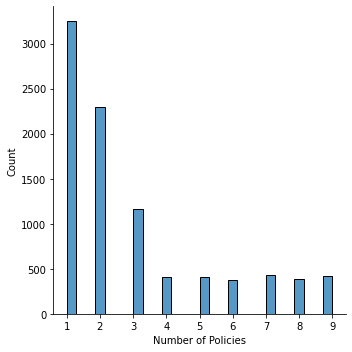

In [76]:
sns.displot(file['Customer Lifetime Value'])
plt.show()
sns.displot(file['Income'])
plt.show()
sns.displot(file['Monthly Premium Auto'])
plt.show()
sns.displot(file['Months Since Last Claim'])
plt.show()
sns.displot(file['Months Since Policy Inception'])
plt.show()
sns.displot(file['Number of Open Complaints'])
plt.show()
sns.displot(file['Number of Policies'])
plt.show()

In [77]:
#Exploration.
#for i in range(7):
#    sns.displot(X_num.iloc[i])
#    plt.show()

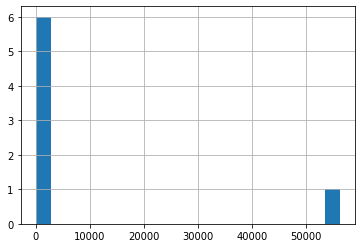

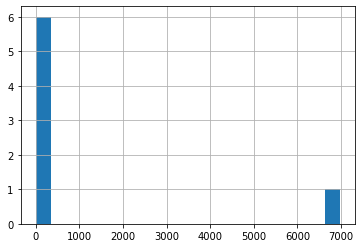

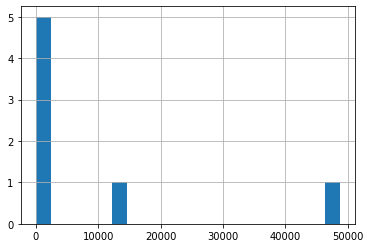

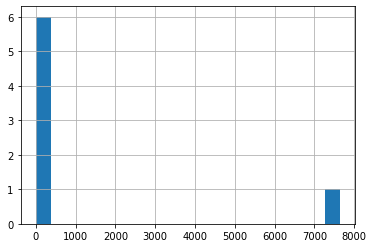

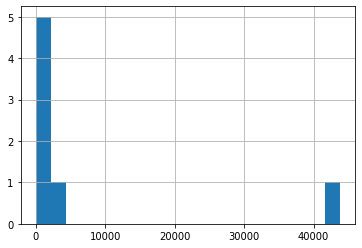

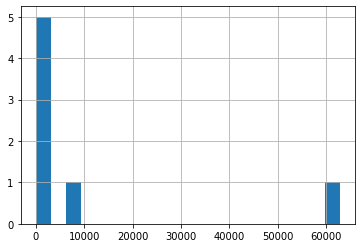

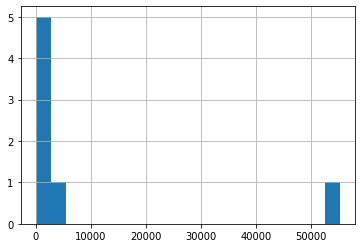

In [78]:
#Explotation, Histograms.
for i in range(7):
    X_num.iloc[i].hist(bins=20)
    plt.show()

In [79]:
#Dealing with outliers
iqr = np.percentile(file['Customer Lifetime Value'],75) - np.percentile(file['Customer Lifetime Value'],25)
upper_limit = np.percentile(file['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(file['Customer Lifetime Value'],25) - 1.5*iqr

iqr = np.percentile(file['Income'],75) - np.percentile(file['Income'],25)
upper_limit = np.percentile(file['Income'],75) + 1.5*iqr
lower_limit = np.percentile(file['Income'],25) - 1.5*iqr

iqr = np.percentile(file['Monthly Premium Auto'],75) - np.percentile(file['Monthly Premium Auto'],25)
upper_limit = np.percentile(file['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(file['Monthly Premium Auto'],25) - 1.5*iqr

iqr = np.percentile(file['Months Since Last Claim'],75) - np.percentile(file['Months Since Last Claim'],25)
upper_limit = np.percentile(file['Months Since Last Claim'],75) + 1.5*iqr
lower_limit = np.percentile(file['Months Since Last Claim'],25) - 1.5*iqr

iqr = np.percentile(file['Months Since Policy Inception'],75) - np.percentile(file['Months Since Policy Inception'],25)
upper_limit = np.percentile(file['Months Since Policy Inception'],75) + 1.5*iqr
lower_limit = np.percentile(file['Months Since Policy Inception'],25) - 1.5*iqr

iqr = np.percentile(file['Number of Open Complaints'],75) - np.percentile(file['Number of Open Complaints'],25)
upper_limit = np.percentile(file['Number of Open Complaints'],75) + 1.5*iqr
lower_limit = np.percentile(file['Number of Open Complaints'],25) - 1.5*iqr

iqr = np.percentile(file['Number of Policies'],75) - np.percentile(file['Number of Policies'],25)
upper_limit = np.percentile(file['Number of Policies'],75) + 1.5*iqr
lower_limit = np.percentile(file['Number of Policies'],25) - 1.5*iqr


In [80]:
file1 = file[(file['Customer Lifetime Value']>lower_limit) & (file['Customer Lifetime Value']<upper_limit)]
file1 = file[(file['Income']>lower_limit) & (file['Income']<upper_limit)]
file1 = file[(file['Monthly Premium Auto']>lower_limit) & (file['Monthly Premium Auto']<upper_limit)]
file1 = file[(file['Months Since Last Claim']>lower_limit) & (file['Months Since Last Claim']<upper_limit)]
file1 = file[(file['Months Since Policy Inception']>lower_limit) & (file['Months Since Policy Inception']<upper_limit)]
file1 = file[(file['Number of Open Complaints']>lower_limit) & (file['Number of Open Complaints']<upper_limit)]
file1 = file[(file['Number of Policies']>lower_limit) & (file['Number of Policies']<upper_limit)]

In [81]:
file1.shape

(8718, 24)

In [82]:
#Normalize the data (Standariced it)
from sklearn.preprocessing import StandardScaler
X_standarized = StandardScaler().fit(X_num).transform(X_num)
X_standarized = pd.DataFrame(X_standarized, columns=X_num.columns)


In [83]:
X_cat.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'Empoyment Status', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [84]:
#Encoding Categorical Data.

X_cat1 = X_cat.drop(['Customer','Effective To Date'], axis=1)

X_cat_onehot = X_cat1.drop(['State', 'Coverage', 'Education', 'Empoyment Status', 'Marital Status', 'Location Code', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Policy Type'], axis=1)

X_cat_label = X_cat1.drop(['Response', 'Gender'], axis=1)


In [85]:
from sklearn.preprocessing import OneHotEncoder
X_hot_encoder = OneHotEncoder().fit(X_cat_onehot).transform(X_cat_onehot).toarray()
X_hot_encoder

array([[1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [86]:
X_hot_encoder = pd.DataFrame(X_hot_encoder)

In [87]:
from sklearn.preprocessing import LabelEncoder
X_lab_encoder = LabelEncoder().fit(X_cat_label['State']).transform(X_cat_label['State'])
X_lab_encoder = pd.DataFrame(X_lab_encoder, columns=['State'])
X_lab_encoder.head()


,State
0,4
1,0
2,2
3,1
4,4


In [88]:
#It does not make too much sense to encode categorical variables, because there are too many categorical options.
#For that it does not have neither sense to concat the tables.

In [89]:
X_concat = pd.concat([X_standarized, X_hot_encoder], axis=1)
X_concat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,0,1,2,3
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,1.0,0.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,1.0,0.0,1.0,0.0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,1.0,0.0,1.0,0.0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,1.0,0.0,0.0,1.0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,1.0,0.0,0.0,1.0
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.0,1.0,1.0,0.0
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.0,0.0,0.0,1.0
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,1.0,0.0,0.0,1.0


In [90]:
#Splitting into train set and test set.
from sklearn.model_selection import train_test_split
X = X_num
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.25, random_state=100)

In [91]:
#Modeling
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train) 
print(lm.intercept_)
print(lm.coef_)

66.93522421922779
[-1.01188841e-03 -3.29252039e-03  5.45645298e+00 -1.01719336e-01
 -1.43891213e-01 -1.07578753e-01  5.04517975e-01]


In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

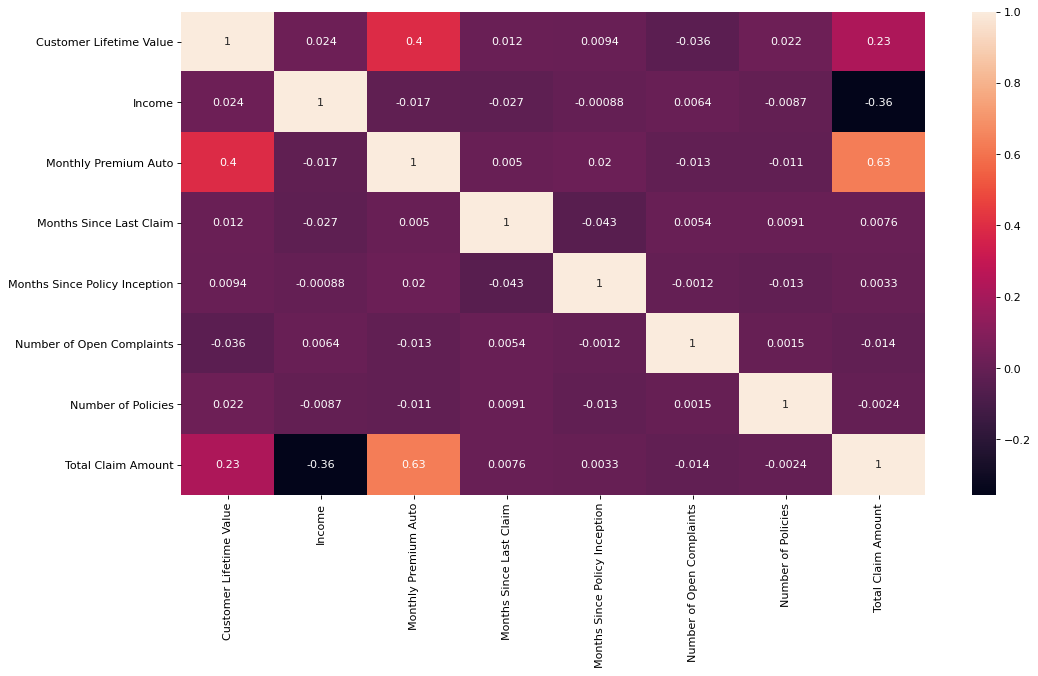

In [93]:
plt.figure(figsize=(15,8), dpi=80)
correlations_matrix = file.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [94]:
#R2
predictions = lm.predict(X_test)
r2_score(y_test, predictions)
r2 = r2_score(y_test, predictions)
r2

0.4842810864484607

In [95]:
#Description: MSE.
mse = mean_squared_error(y_test, predictions)
print(mse)

41348.336354982646


In [96]:
#Description: RMSE.
rmse = math.sqrt(mse)
print(rmse)

203.3429033799376


In [97]:
#Description: MAE.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

147.69641546590404